In [2]:
%matplotlib inline
import matplotlib
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
import expectexception

In [6]:
df = pd.read_csv("./sam/data/combinedData.csv")

/usr/local/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,13,14,24) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [7]:
df.head()

,Unnamed: 0,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,AdmissionDt,ClmAdmitDiagnosisCode,DeductibleAmtPaid,DischargeDt,DiagnosisGroupCode,ClmDiagnosisCode_1,ClmDiagnosisCode_2,ClmDiagnosisCode_3,ClmDiagnosisCode_4,ClmDiagnosisCode_5,ClmDiagnosisCode_6,ClmDiagnosisCode_7,ClmDiagnosisCode_8,ClmDiagnosisCode_9,ClmDiagnosisCode_10,ClmProcedureCode_1,ClmProcedureCode_2,ClmProcedureCode_3,ClmProcedureCode_4,ClmProcedureCode_5,ClmProcedureCode_6,Set,Status,DOB,DOD,Gender,Race,RenalDiseaseIndicator,State,County,NoOfMonths_PartACov,NoOfMonths_PartBCov,Alzheimer,HeartFailure,KidneyDisease,Cancer,ObstrPulmonary,Depression,Diabetes,IschemicHeart,Osteoporasis,RheumatoidArthritis,Stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,WhetherDead,NumChronics,NumProc,NumDiag,AdmissionDays,ClaimDays,Age,TotalClaim,DailyCharge,InscCovPercent,DupRecord
0,0,BENE11001,CLM46614,2009-04-12,2009-04-18,PRV55912,26000,PHY390922,NaN,NaN,2009-04-12,7866,1068.0,2009-04-18,201,1970,4019,5853,7843,2768,71590,2724,19889,5849,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,10,7.0,7,66.0,27068.0,3866.857143,0.960544,0
1,1,BENE11001,CLM66048,2009-08-31,2009-09-02,PRV55907,5000,PHY318495,PHY318495,NaN,2009-08-31,6186,1068.0,2009-09-02,750,6186,2948,56400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7092.0,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,1,4,3.0,3,67.0,6068.0,2022.666667,0.823995,0
2,2,BENE11001,CLM68358,2009-09-17,2009-09-20,PRV56046,5000,PHY372395,NaN,PHY324689,2009-09-17,29590,1068.0,2009-09-20,883,29623,30390,71690,34590,V1581,32723,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,in,1943-01-01,NaN,1,1,0,Pennsylvania,230,12,12,1,0,1,0,0,1,1,1,0,1,1,36000,3204,60,70,0,7,0,7,4.0,4,67.0,6068.0,1517.000000,0.823995,0
3,3,BENE11011,CLM38412,2009-02-14,2009-02-22,PRV52405,5000,PHY369659,PHY392961,PHY349768,2009-02-14,431,1068.0,2009-02-22,067,43491,2762,7843,32723,V1041,4254,25062,40390,4019,NaN,331.0,NaN,NaN,NaN,NaN,NaN,Train,in,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,1,10,9.0,9,95.0,6068.0,674.222222,0.823995,0
4,4,BENE11011,CLM144521,2009-01-18,2009-01-18,PRV52314,50,PHY379398,NaN,NaN,NaN,78900,0.0,NaN,NaN,78969,78701,V5866,59389,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Train,out,1914-03-01,NaN,0,2,0,Alabama,360,12,12,0,1,1,0,0,1,1,0,0,1,1,5000,1068,250,320,0,6,0,6,NaN,1,95.0,50.0,50.000000,1.000000,0


In [8]:
diag = df[["ClaimID",
           "Depression",
           "Alzheimer",
           "RheumatoidArthritis",
           "Osteoporasis",
           
           "Diabetes",
           "KidneyDisease",
           "IschemicHeart",
           "Stroke",

           "ObstrPulmonary",
           "HeartFailure",
           "Cancer",
           ]]

In [9]:
diag.head()

,ClaimID,Depression,Alzheimer,RheumatoidArthritis,Osteoporasis,Diabetes,KidneyDisease,IschemicHeart,Stroke,ObstrPulmonary,HeartFailure,Cancer
0,CLM46614,1,1,1,0,1,1,1,1,0,0,0
1,CLM66048,1,1,1,0,1,1,1,1,0,0,0
2,CLM68358,1,1,1,0,1,1,1,1,0,0,0
3,CLM38412,1,0,1,0,1,1,0,1,0,1,0
4,CLM144521,1,0,1,0,1,1,0,1,0,1,0


In [10]:
diag = diag.fillna(0).set_index('ClaimID')

In [11]:
diag.head()

,Depression,Alzheimer,RheumatoidArthritis,Osteoporasis,Diabetes,KidneyDisease,IschemicHeart,Stroke,ObstrPulmonary,HeartFailure,Cancer
ClaimID,,,,,,,,,,,
CLM46614,1,1,1,0,1,1,1,1,0,0,0
CLM66048,1,1,1,0,1,1,1,1,0,0,0
CLM68358,1,1,1,0,1,1,1,1,0,0,0
CLM38412,1,0,1,0,1,1,0,1,0,1,0
CLM144521,1,0,1,0,1,1,0,1,0,1,0


In [12]:
frequent_itemsets = apriori(diag, min_support=0.3, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1)
rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Diabetes),(Depression),0.705953,0.434364,0.347886,0.492790,1.134509,0.041246,1.115191
1,(Depression),(Diabetes),0.434364,0.705953,0.347886,0.800910,1.134509,0.041246,1.476957
2,(IschemicHeart),(Depression),0.759334,0.434364,0.357706,0.471079,1.084526,0.027879,1.069415
3,(Depression),(IschemicHeart),0.434364,0.759334,0.357706,0.823517,1.084526,0.027879,1.363683
4,(Alzheimer),(Diabetes),0.402142,0.705953,0.325065,0.808333,1.145025,0.041172,1.534159


In [13]:
rules[(rules['lift'] >= 1)&(rules['confidence'] >= 0.8)].sort_values("lift",ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
28,"(KidneyDisease, IschemicHeart)",(Diabetes),0.363531,0.705953,0.323995,0.891246,1.262472,0.067360,2.703771
9,(KidneyDisease),(Diabetes),0.412772,0.705953,0.360310,0.872903,1.236488,0.068912,2.313557
22,"(IschemicHeart, Depression)",(Diabetes),0.357706,0.705953,0.301345,0.842438,1.193335,0.048822,1.866235
34,"(HeartFailure, IschemicHeart)",(Diabetes),0.505207,0.705953,0.423662,0.838590,1.187885,0.067009,1.821746
26,"(Diabetes, KidneyDisease)",(IschemicHeart),0.360310,0.759334,0.323995,0.899213,1.184213,0.050400,2.387861
32,"(HeartFailure, Diabetes)",(IschemicHeart),0.477801,0.759334,0.423662,0.886691,1.167723,0.060852,2.123987
14,(KidneyDisease),(IschemicHeart),0.412772,0.759334,0.363531,0.880706,1.159840,0.050099,2.017416
4,(Alzheimer),(Diabetes),0.402142,0.705953,0.325065,0.808333,1.145025,0.041172,1.534159
13,(HeartFailure),(Diabetes),0.591221,0.705953,0.477801,0.808159,1.144777,0.060426,1.532761
21,"(Diabetes, Depression)",(IschemicHeart),0.347886,0.759334,0.301345,0.866218,1.140761,0.037184,1.798941


In [14]:
lift=rules['lift'].values
support=rules['support'].values
confidence=rules['confidence'].values

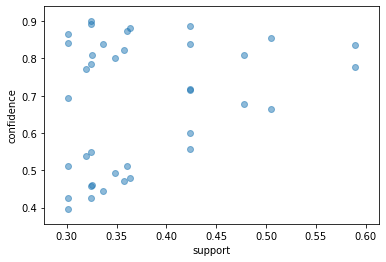

In [15]:
import random
import matplotlib.pyplot as plt
 
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('support')
plt.ylabel('confidence') 
plt.show()

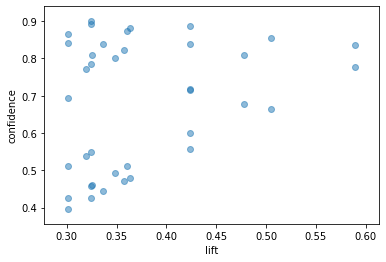

In [16]:
for i in range (len(support)):
    support[i] = support[i]
    confidence[i] = confidence[i]

plt.scatter(support, confidence,   alpha=0.5)
plt.xlabel('lift')
plt.ylabel('confidence') 
plt.show()